# El modelo de Ising

In [7]:
using PyPlot

INFO: Loading help data...


El modelo de Ising es un modelo simplificado de un imán tipo hierro.

Consideremos que hay una red periódica de átomos, y que cada átomo tiene un "espín" (dipolo magnético, o "imancito") que puede apuntar hacia arriba o hacia abajo. Los dipolos *interactúan* con sus vecinos: en el caso ferromagnético, hay una tendencia a que *se alineen* con sus vecinos. 

[Esto se debe a la llamada *interacción de intercambio*, el cual es un fenómeno cuántico complicado; véase, por ejemplo, el libro *The Theory of Magnetism Made Simple* de Mattis.  No es, de hecho, ¡nada "simple"...!]

Inicialmente trabajeremos con una red cuadrada en dos dimensiones, de tamaño finito $L \times L$. Llamaremos $N := L^2$ el número de espines.

Denotaremos el espín en el lugar $i$ por $\sigma_i \in \{+1, -1\}$, y por una configuración completa por $\pmb {\sigma} := (\sigma_{i})_{i=1}^{N}$. [Nótese que estamos pensando aquí que cada sitio tiene una etiqueta que es un entero. También será útil pensar que la etiqueta es de la forma $(i,j)$.]

Denotaremos por $\Omega_{N}$ el conjunto de todas las configuraciones posibles, es decir, el *espacio de configuraciones*.

[1] ¿Cuál es la cardinalidad $|\Omega_N|$, es decir, cuántas configuraciones hay?

\begin{equation}
|\Omega_N| = 2^N
\end{equation}
En cada sitio hay dos posibilidades, espín para arriba y para abajo.

[2] Escribe una función que genere una configuración "aleatoria". ¿Qué tipo de aleatoriedad es?

In [8]:
function conf_aleatoria(L::Int64,p=0.5)
    configuracion=ones(L,L)
    for i in 1:L
        for j in 1:L
            if rand()<=p
                configuracion[i,j]=-1
            end
        end
    end
    return configuracion 
end

conf_aleatoria (generic function with 2 methods)

In [9]:
A=conf_aleatoria(4) #aleatoriedad chingona
#la buena

4x4 Array{Float64,2}:
  1.0  -1.0   1.0  -1.0
 -1.0  -1.0   1.0   1.0
 -1.0  -1.0   1.0   1.0
 -1.0   1.0  -1.0   1.0

[3] La *magnetización* de una configuración $\pmb \sigma$ se define como $M(\pmb \sigma) := \sum_i \sigma_i$. 

(i) Escribe una función para calcular la magnetización de una configuración.

(ii) ¿Cuáles son los valores posibles de la magnetización para un sistema de tamaño $N$?

(iii) Genera bastantes configuraciones al azar y calcula la magnetización de cada una.

(iv) ¿Cuáles valores realmente toma? Dibuja un histograma de los valores de la magnetización que obtienes para un sistema grande. ¿Qué observas?

In [10]:
magnetizacion(A::Array{Float64})=sum(A)

magnetizacion (generic function with 1 method)

In [11]:
magnetizacion(A)

0.0

Los valores posibles para la magnetización de un sistema de tamaño $N$ son $i$ con $i \in [-N,N]$

In [12]:
function magnetizaciones(L::Int64,num_configuraciones::Int64)
    out=zeros(Int,num_configuraciones)
    for i in 1:num_configuraciones
        out[i]=magnetizacion(conf_aleatoria(L))
    end
    out
end

magnetizaciones (generic function with 1 method)

In [13]:
l=50
d=magnetizaciones(l,50000);

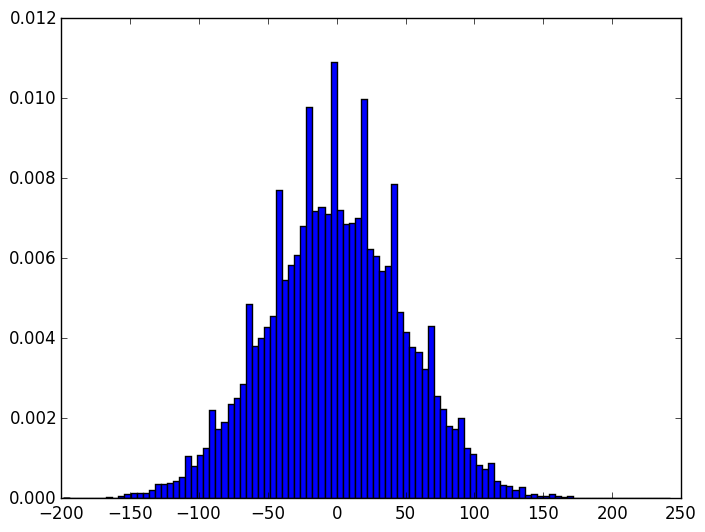

In [14]:
plt.hist(d,100,normed=true);

Tomamos muchas configuraciones aleatorias $(5000)$ y parece tomar valores en un intervalo $[-5L,5L]$

[4] Podemos llevar a cabo un proceso estocástico en el espacio $\Omega$. Un paso es como sigue:

1. Escoge un espín al azar.

2. Cambiarlo al valor opuesto. (Esto se suele llamar un "flip" = "darle la vuelta".)

(i) ¿Qué tipo de proceso es? ¿A qué te recuerda?

(ii) Impleméntalo, partiendo de una configuración aleatoria. 

(iii) Dibuja cómo cambia la magnetización en el tiempo. ¿Qué observas?  

(iv) ¿Cuál es el *promedio temporal* (promedio *en el tiempo*) de la magnetización?



###(i) Al primer paso de un memorama

In [15]:
function flip_one(A::Array{Float64,2},L::Int64)
    i,j=rand(1:L),rand(1:L)
    A[i,j]*=-1
    A
end

flip_one (generic function with 1 method)

In [16]:
flip_one(A,4)

4x4 Array{Float64,2}:
  1.0  -1.0   1.0  -1.0
 -1.0  -1.0   1.0  -1.0
 -1.0  -1.0   1.0   1.0
 -1.0   1.0  -1.0   1.0

In [21]:
function evolucion_magnetizacion(A0::Array{Float64,2},L::Int64,tiempo::Int64)
    out=zeros(tiempo+1)
    out[1]=magnetizacion(A0)
    for i in 1:tiempo
        A_new=flip_one(A0,L)
        out[i+1]=magnetizacion(A_new)
        A0=A_new
    end
    out
end

evolucion_magnetizacion (generic function with 1 method)

In [22]:
L=100
tiempo=500000
A0=conf_aleatoria(L)
evolucion=evolucion_magnetizacion(A0,L,tiempo);

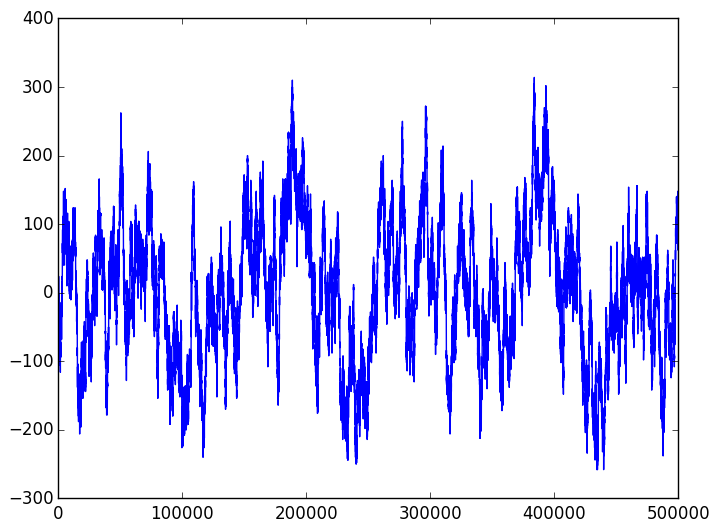

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9fe6c893d0>

In [23]:
plot(evolucion,"-")

In [24]:
mean(evolucion)

1.5774248451503097

El promedio temporal parece ir a cero, lo cual tiene sentido porque ya visitó muy posiblemente todos los sitios y los cambió por lo que tiende a variar alrededor del cero.

## La energía

Hasta ahora, no hemos modelado las *interacciones* entre los espines, que es lo que hace interesante y rico el modelo. Para ello, tomaremos en cuenta que los espines "quieren" alinearse con sus vecinos, es decir, que la *energía* será *menor* cuando dos vecinos estén alineados.

[5] Considera un par de espines vecinos $\sigma_i$ y $\sigma_j$. 

(i) Escribe una tabla de los valores posibles de los dos espines y las energías correspondientes que asignaremos, si a un par de vecinos iguales le asignamos la energía $-J$ y a un par de vecinos desiguales la energía $J$.

(ii) Escribe esta energía como una fórmula en términos de los valores $\sigma_i$ y $\sigma_j$. 

(iii) Así, escribe una fórmula para la energía $E(\pmb \sigma)$ de una configuración $\pmb \sigma$.

\begin{array}[c c c] 
$\sigma_i & \sigma_j & \mathbf{E} \\
+1 & +1 & -J \\
+1 & -1 & +J \\
-1 & +1 & +J \\
-1 & -1 & -J 
\end{array}


\begin{equation}
\mathbf{E} = -J\sum^{N}_{\langle i j \rangle} \sigma_i \sigma_j
\end{equation}

[6] Implementa una función que toma una configuración $\pmb \sigma$ y regresa la energía correspondiente, $E(\pmb \sigma)$. 

In [40]:
function sitios_fantasma(A::Array{Float64,2},L::Int64)
    out=zeros(L+2,L+2)
    out[2:L+1,2:L+1]=A
    out[1,2:L+1]=A[L,:]
    out[L+2,2:L+1]=A[1,:]
    out[2:L+1,1]=A[:,L]
    out[2:L+1,L+2]=A[:,1]
    out
end

sitios_fantasma (generic function with 1 method)

In [45]:
function energia_ph(configuracion_ph::Array{Float64,2},L_sin_ph::Int64)
    out=0.0
    for i in 2:L_sin_ph+1
        for j in 2:L_sin_ph+1
        out+=configuracion_ph[i,j]*(configuracion_ph[i-1,j]+configuracion_ph[i+1,j]+configuracion_ph[i,j-1]+configuracion_ph[i,j+1])
        end
    end
    out
end

energia_ph (generic function with 1 method)

In [49]:
L=3
a=conf_aleatoria(L)
b=sitios_fantasma(a,L)
println(b)
energia_ph(b,L)

[0.0 -1.0 -1.0 -1.0 0.0
 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 -1.0 1.0 1.0
 -1.0 -1.0 -1.0 -1.0 -1.0
 0.0 1.0 1.0 1.0 0.0]


4.0

In [32]:
function evolucion_energia(A0::Array{Float64,2},L::Int64,tiempo::Int64)
    out=zeros(tiempo+1)
    out[1]=energia_ph(sitios_fantasma(A0,L),L)
    for t in 1:tiempo
        A0_new=flip_one(A0,L)
        out[t+1]=energia_ph(sitios_fantasma(A0_new,L),L)
        A0=A0_new
    end
    out
end

evolucion_energia (generic function with 1 method)

In [65]:
tiempo=500000
L=100
CA=conf_aleatoria(L)
evolenergia=evolucion_energia(CA,L,tiempo);

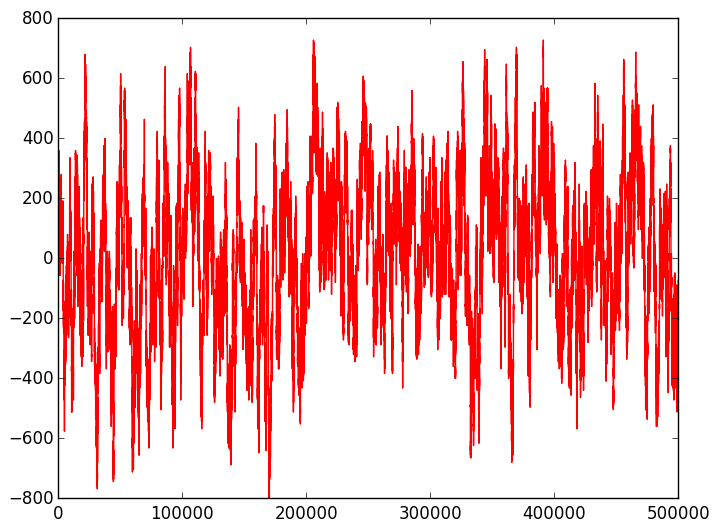

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa0013e7450>

In [66]:
plot(evolenergia,"r-")

In [67]:
mean(evolenergia)

10.583562832874334

[7] En la pregunta [6], hubo que escoger qué hacer en las fronteras e la configuración finita. Enumera unas posibilidades de cómo tratar las fronteras e impleméntalas.

- Sitios fantasma
- Condiciones periódicas
- Condiciones aleatorias

In [1]:
sitios_fantasma

LoadError: sitios_fantasma not defined
while loading In[1], in expression starting on line 1

[8] Repite la pregunta [4] para la energía, en lugar de la magnetización.

¿A qué temperatura [concepto que aún no hemos introducido] correspondaría esta dinámica?

In [84]:
tiempo=15000
L=100
CNA=ones(L,L)
evolenergiaNA=evolucion_energia(CNA,L,tiempo);

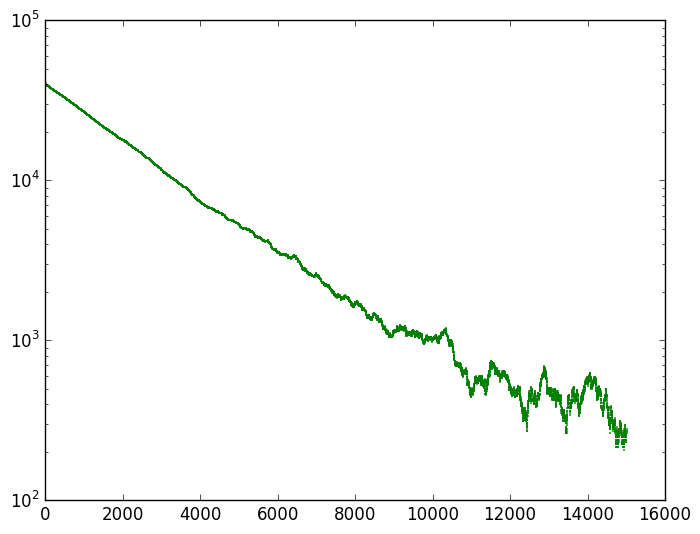

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9fe28390d0>

In [86]:
semilogy(evolenergiaNA,"gx",markersize=1)